In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import copy
import Image
import tensorflow as tf

import os
import time
import numpy as np
from IPython.display import clear_output
import sys
import csv
import math
from matplotlib import colors
import fcn32_new as fcn32_vgg
ckpt_dir = "/mnt/data1/fcn/ckpt_dir"
PRETRAINED_MODEL_PATH= "/mnt/data1/fcn/ckpt_dir"
LOGS_PATH = '/home/sik4hi/tensorflow_logs'
WEIGHT_PATH = '.npy'
TRAINSET_PATH = "/mnt/data3/Game_data/masks/16538.bin"
filename = "/mnt/data3/Game_data/classes/16538.png" 
VALSET_PATH = '/mnt/data1/city/csv_files/cityscapes_val.csv'

NUM_OF_CLASSESS = 19
BATCH_SIZE = 1
IMAGE_HEIGHT = 1052
IMAGE_WIDTH = 1914
NUM_CHANNELS = 3
N_EPOCHS = 300
os.environ["CUDA_VISIBLE_DEVICES"] = ""

record_bytes=2013528
filename_queue = tf.train.string_input_producer([TRAINSET_PATH])
reader=tf.FixedLengthRecordReader(record_bytes=record_bytes)
key, value =reader.read(filename_queue)
ww=tf.decode_raw(value,tf.uint8)
ww=tf.reshape(ww,[1052,1914])


In [2]:
cmap = colors.ListedColormap([[0.4667,0.0431,0.1254],[0.0784,0.0784,0.0784],[0,0.2353,0.3921]
                              ,[0,0,0.5569],[0.7451,0.6,0.6],[0,0,0.902]
                              ,[0.8627,0.0784,0.2352],[0.6,0.6,0.6],[1,0,0]
                              ,[0.502,0.251,0.502],[0.9569,0.1372,0.9098],[0.2745,0.5098,0.7059]
                              ,[0.5961,0.9843,0.5961],[0.9804,0.6667,0.1176],[0.8627,0.8627,0]
                              ,[0,0.3137,0.3922],[0,0,0.2745],[0.4196,0.5569,0.1372]
                              ,[0.4,0.4,0.6118],[0,0,0]])
norm=colors.NoNorm(0,19)
with tf.device('/cpu:0'):
    sess = tf.Session()
    init_op = tf.group(tf.initialize_all_variables(),
                       tf.initialize_local_variables())
    sess.run(init_op)
    
    threads = tf.train.start_queue_runners(sess=sess)

1052


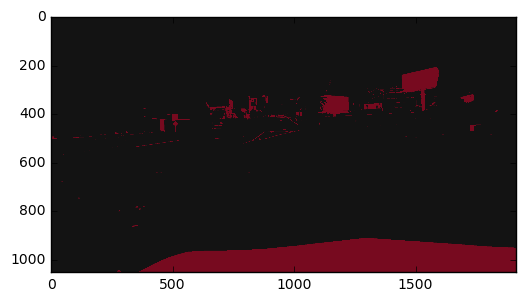

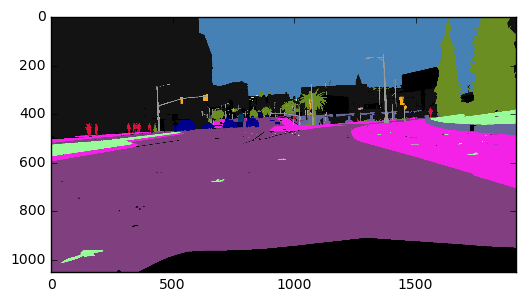

In [3]:
with tf.device('/cpu:0'):    
    for iteration in xrange(1):
        output = sess.run(ww)
    print(len(output))
    plt.figure(1)
    plt.imshow(output,cmap=cmap,norm=norm)
    #plt.show()
img= Image.open(filename)
a=np.array(img)
plt.figure(2)
plt.imshow(a,cmap=cmap,norm=norm)
plt.show()